# Прогнозирование стоимости квартир на побережье Черного моря. 
# EDA
Цель данного упражнения:
* Ознакомиться с данными, которые у нас есть
* Понять, какую информацию мы сможем из них взять
* Понять, какие данные влияют на целевую переменную, а какие нет
* Понять, какие данные необходимо собирать из внешних источников
* Сформировать желаемый вид датасета, к которому будем стремиться преобразовать собранные данные

In [603]:
# Загрузка библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

# Первичный осмотр данных
Посмотрим на выгруженные данные.

In [511]:
df = pd.read_csv('cian.csv')

In [512]:
display(df.head())
df.info()

,balconiesCount,category,flatType,floorNumber,fromDeveloper,isApartments,isAuction,kitchenArea,livingArea,loggiasCount,...,price,mortgageAllowed,region,city,floorsCount,buildYear,isComplete,passengerLiftsCount,cargoLiftsCount,materialType
0,NaN,newBuildingFlatSale,rooms,5.0,True,True,True,NaN,NaN,NaN,...,18288000,True,Крым,Ялта,10,NaN,True,1.0,0.0,monolith
1,NaN,flatSale,rooms,2.0,False,NaN,True,NaN,26.0,1.0,...,3984750,NaN,Крым,Ялта,6,2015.0,True,1.0,NaN,monolithBrick
2,NaN,newBuildingFlatSale,rooms,15.0,True,True,True,NaN,NaN,NaN,...,14580000,True,Крым,Ялта,18,NaN,True,1.0,0.0,monolith
3,NaN,newBuildingFlatSale,rooms,7.0,True,False,True,NaN,NaN,NaN,...,5200000,True,Крым,Ялта,8,NaN,True,1.0,0.0,monolith
4,1.0,newBuildingFlatSale,rooms,6.0,True,True,True,NaN,NaN,NaN,...,21024000,True,Крым,Ялта,10,NaN,True,1.0,0.0,monolith


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36509 entries, 0 to 36508
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   balconiesCount       19927 non-null  float64
 1   category             36509 non-null  object 
 2   flatType             36509 non-null  object 
 3   floorNumber          36508 non-null  float64
 4   fromDeveloper        36509 non-null  bool   
 5   isApartments         20701 non-null  object 
 6   isAuction            36509 non-null  bool   
 7   kitchenArea          20365 non-null  float64
 8   livingArea           20737 non-null  float64
 9   loggiasCount         17307 non-null  float64
 10  roomsCount           33761 non-null  float64
 11  totalArea            36509 non-null  float64
 12  price                36509 non-null  int64  
 13  mortgageAllowed      25381 non-null  object 
 14  region               36509 non-null  object 
 15  city                 36509 non-null 

In [513]:
df.drop_duplicates()

,balconiesCount,category,flatType,floorNumber,fromDeveloper,isApartments,isAuction,kitchenArea,livingArea,loggiasCount,...,price,mortgageAllowed,region,city,floorsCount,buildYear,isComplete,passengerLiftsCount,cargoLiftsCount,materialType
0,NaN,newBuildingFlatSale,rooms,5.0,True,True,True,NaN,NaN,NaN,...,18288000,True,Крым,Ялта,10,NaN,True,1.0,0.0,monolith
1,NaN,flatSale,rooms,2.0,False,NaN,True,NaN,26.0,1.0,...,3984750,NaN,Крым,Ялта,6,2015.0,True,1.0,NaN,monolithBrick
2,NaN,newBuildingFlatSale,rooms,15.0,True,True,True,NaN,NaN,NaN,...,14580000,True,Крым,Ялта,18,NaN,True,1.0,0.0,monolith
3,NaN,newBuildingFlatSale,rooms,7.0,True,False,True,NaN,NaN,NaN,...,5200000,True,Крым,Ялта,8,NaN,True,1.0,0.0,monolith
4,1.0,newBuildingFlatSale,rooms,6.0,True,True,True,NaN,NaN,NaN,...,21024000,True,Крым,Ялта,10,NaN,True,1.0,0.0,monolith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36504,NaN,flatSale,rooms,7.0,False,False,False,10.9,44.0,1.0,...,3050000,True,Краснодарский,Анапа,9,1991.0,True,1.0,NaN,panel
36505,NaN,flatSale,rooms,6.0,False,False,False,10.9,44.3,1.0,...,3050000,True,Краснодарский,Анапа,9,1991.0,True,1.0,NaN,panel
36506,2.0,flatSale,rooms,9.0,False,NaN,False,10.0,48.6,2.0,...,3100000,False,Краснодарский,Анапа,9,1991.0,True,1.0,0.0,panel
36507,0.0,flatSale,rooms,9.0,False,NaN,False,10.0,43.8,2.0,...,3200000,True,Краснодарский,Анапа,9,1992.0,True,1.0,0.0,monolith


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36509 entries, 0 to 36508
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   balconiesCount       19927 non-null  float64
 1   category             36509 non-null  object 
 2   flatType             36509 non-null  object 
 3   floorNumber          36508 non-null  float64
 4   fromDeveloper        36509 non-null  bool   
 5   isApartments         20701 non-null  object 
 6   isAuction            36509 non-null  bool   
 7   kitchenArea          20365 non-null  float64
 8   livingArea           20737 non-null  float64
 9   loggiasCount         17307 non-null  float64
 10  roomsCount           33761 non-null  float64
 11  totalArea            36509 non-null  float64
 12  price                36509 non-null  int64  
 13  mortgageAllowed      25381 non-null  object 
 14  region               36509 non-null  object 
 15  city                 36509 non-null 

Нам удалось выгрузить с cian 22 признака, некоторые содержат пропуски.

Для удобства переименуем столбцы

# Первичный осмотр данных в столбцах

Напишем функцию, которая выдаст нам необходимую информацию для первичного анализа признака.

In [515]:
def col_info(ys):
    print('Количество пропусков: {},'.format(ys.isnull().sum()))
    print('{},'.format(ys.describe()))
    print('Распределение:\n{},'.format(ys.value_counts()))
    ys.hist()

## balconiesCount
Количество балконов

Применим функцию col_info() для анализа признака:

Количество пропусков: 16582,
count    19927.000000
mean         0.891755
std          0.606992
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: balconiesCount, dtype: float64,
Распределение:
1.0    13563
0.0     4441
2.0     1626
3.0      233
4.0       64
Name: balconiesCount, dtype: int64,


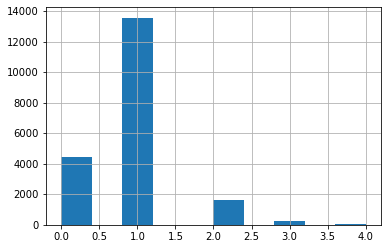

In [516]:
col_info(df.balconiesCount)

Скорее всего пропуски означают отсутствие балкона. Заменим их на значение 0

In [517]:
df.balconiesCount = df.balconiesCount.fillna(0)

Количество пропусков: 0,
count    36509.000000
mean         0.486729
std          0.631060
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: balconiesCount, dtype: float64,
Распределение:
0.0    21023
1.0    13563
2.0     1626
3.0      233
4.0       64
Name: balconiesCount, dtype: int64,


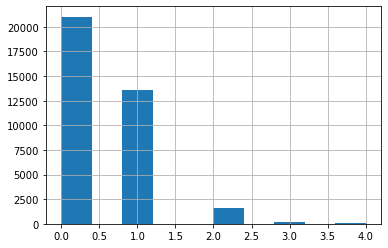

In [518]:
col_info(df.balconiesCount)

Возможно, стоит сделать признак бинарным (есть балкон или нет), но пока что оставим как есть.

## loggiasCount
Количество лоджий

Количество пропусков: 19202,
count    17307.000000
mean         0.677067
std          0.672989
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: loggiasCount, dtype: float64,
Распределение:
1.0    8509
0.0    7319
2.0    1274
3.0     159
4.0      46
Name: loggiasCount, dtype: int64,


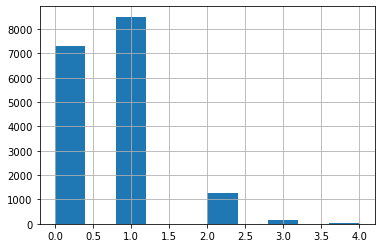

In [519]:
col_info(df.loggiasCount)

Аналогично балконам, заменим пропуски на нули.

In [520]:
df.loggiasCount = df.loggiasCount.fillna(0)

## category
Категория объявления - новая квартира или вторичное жилье

Количество пропусков: 0,
count        36509
unique           2
top       flatSale
freq         31701
Name: category, dtype: object,
Распределение:
flatSale               31701
newBuildingFlatSale     4808
Name: category, dtype: int64,


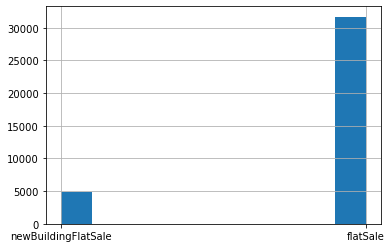

In [521]:
col_info(df.category)

Пропусков нет. Сделаем признак бинарным и переименуем колонку в newBuilding.

In [522]:
dic_category = {
    'newBuildingFlatSale': 1,
    'flatSale': 0,
}
df['category'] = df['category'].map(dic_category)
df.rename(columns = {'category':'newBuilding'}, inplace = True) 

## flatType
Тип квартиры (комнаты, студия, свободная планировка)

Количество пропусков: 0,
count     36509
unique        3
top       rooms
freq      33761
Name: flatType, dtype: object,
Распределение:
rooms       33761
studio       2195
openPlan      553
Name: flatType, dtype: int64,


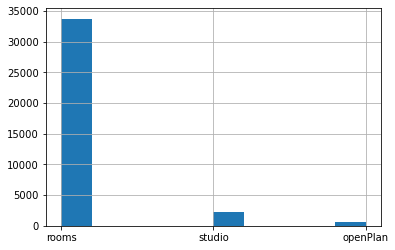

In [523]:
col_info(df.flatType)

## floorsCount
Количество этажей в здании

Количество пропусков: 0,
count    36509.000000
mean         8.964475
std          5.640262
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         45.000000
Name: floorsCount, dtype: float64,
Распределение:
5     7558
9     4521
10    2766
4     2357
3     2323
16    1713
6     1700
2     1595
8     1521
7     1420
12    1164
11     869
14     832
18     779
20     762
15     684
13     680
17     603
1      576
21     407
24     391
19     386
25     254
23     225
22     152
27     118
26     113
30      34
32       3
45       1
28       1
31       1
Name: floorsCount, dtype: int64,


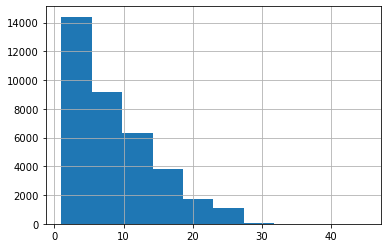

In [524]:
col_info(df.floorsCount)

## floorNumber
Этаж

Количество пропусков: 1,
count    36508.000000
mean         5.076449
std          4.112924
min         -2.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         27.000000
Name: floorNumber, dtype: float64,
Распределение:
 1.0     6003
 2.0     5627
 3.0     4703
 4.0     4114
 5.0     4046
 6.0     2139
 7.0     1910
 9.0     1637
 8.0     1545
 10.0    1116
 11.0     661
 12.0     616
 15.0     405
 14.0     379
 13.0     366
 16.0     327
 17.0     215
 18.0     205
 19.0     137
 20.0     113
 21.0      75
 22.0      46
-1.0       37
 23.0      35
 24.0      26
 25.0      22
 27.0       1
 26.0       1
-2.0        1
Name: floorNumber, dtype: int64,


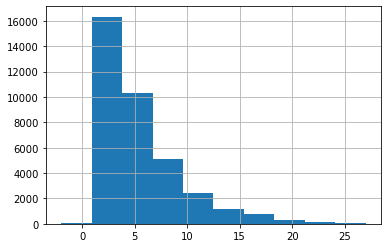

In [525]:
col_info(df.floorNumber)

Всего один пропуск в восьмиэтажном здании. Удалим пропуск.

In [526]:
df = df[df['floorNumber'].isna() == False]

На основании признаков floorNumber и floorsCount можем сгенерировать новые признаки:
* isBasement - в случае, если этаж ниже первого
* isFristFloor - первый этаж
* isLastFloor - последний этаж

## fromDeveloper
От застройщика?

In [527]:
print('Количество пропусков: {},'.format(df.fromDeveloper.isnull().sum()))
print('{},'.format(df.fromDeveloper.describe()))
print('Распределение:\n{},'.format(df.fromDeveloper.value_counts()))

Количество пропусков: 0,
count     36508
unique        2
top       False
freq      34094
Name: fromDeveloper, dtype: object,
Распределение:
False    34094
True      2414
Name: fromDeveloper, dtype: int64,


Заменим значения на 1 и 0

In [528]:
dic_fromDeveloper = {
    True: 1,
    False: 0,
}
df['fromDeveloper'] = df['fromDeveloper'].map(dic_fromDeveloper)

## isApartments
Является ли квартира апартаментами

In [529]:
print('Количество пропусков: {},'.format(df.isApartments.isnull().sum()))
print('{},'.format(df.isApartments.describe()))
print('Распределение:\n{},'.format(df.isApartments.value_counts()))

Количество пропусков: 15807,
count     20701
unique        2
top       False
freq      18058
Name: isApartments, dtype: object,
Распределение:
False    18058
True      2643
Name: isApartments, dtype: int64,


Заменим пропуски на False. Раз значение не указано, скорее всего квартира апартаментами не является.

In [530]:
df.isApartments = df.isApartments.fillna(False)

Заменим значения на 1 и 0

In [531]:
dic_isApartments = {
    True: 1,
    False: 0,
}
df['isApartments'] = df['isApartments'].map(dic_isApartments)

## isAuction
Является ли продажа аукционом?

In [532]:
print('Количество пропусков: {},'.format(df.isApartments.isnull().sum()))
print('{},'.format(df.isApartments.describe()))
print('Распределение:\n{},'.format(df.isApartments.value_counts()))

Количество пропусков: 0,
count    36508.000000
mean         0.072395
std          0.259145
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: isApartments, dtype: float64,
Распределение:
0    33865
1     2643
Name: isApartments, dtype: int64,


In [533]:
dic_isAuction = {
    True: 1,
    False: 0,
}
df['isAuction'] = df['isAuction'].map(dic_isAuction)

## totalArea
Общая площадь

Количество пропусков: 0,
count    36508.000000
mean        66.756973
std         54.156476
min         10.000000
25%         42.000000
50%         57.000000
75%         76.900000
max       5471.000000
Name: totalArea, dtype: float64,
Распределение:
60.00    687
50.00    638
45.00    623
70.00    606
40.00    571
        ... 
71.32      1
47.44      1
24.92      1
64.64      1
19.01      1
Name: totalArea, Length: 2605, dtype: int64,


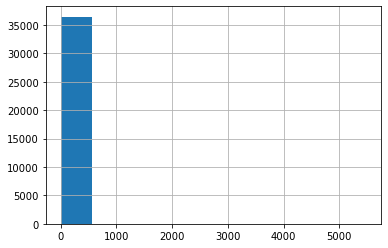

In [534]:
col_info(df.totalArea)

Видим, что есть выбросы. Напишем функцию, которая поможет определить и отбросить выбросы.

In [535]:
def outliers_iqr(ys): # Передаем на вход признак-столбец датафрейма
    # Находим необходимые параметры
    median = ys.median()
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    print('Медиана: {},'.format(median),'25-й перцентиль: {},'.format(quartile_1), '75-й перцентиль: {},'.format(quartile_3)
      , "IQR: {}, ".format(iqr),"Границы выбросов: [{}, {}].".format(lower_bound,upper_bound))
    # Отбрасываем значения, лежещие за пределами границ, рисуем график
    ys.loc[ys.between(lower_bound, upper_bound)].hist(bins = int(upper_bound-lower_bound), range = (lower_bound, upper_bound), label = 'IQR')
    plt.legend();
    # На выход отдаем отфильтрованные значения
    return ys.mask((ys > upper_bound) | (ys < lower_bound))

In [536]:
# totalArea_outliners_free = outliers_iqr(df.totalArea)

Медиана: 57.0, 25-й перцентиль: 42.0, 75-й перцентиль: 76.85, IQR: 34.849999999999994,  Границы выбросов: [-10.274999999999991, 129.125].

Квартиры с площадью более более 127,5 м^2 являются выбросами. Отбросим эти квартиры.

In [537]:
df = df[df.totalArea < 128]

## livingArea
Жилая площадь

Количество пропусков: 14488,
count    19752.000000
mean        33.678336
std         15.761507
min          1.000000
25%         20.000000
50%         31.300000
75%         42.000000
max        126.700000
Name: livingArea, dtype: float64,
Распределение:
30.0     870
20.0     756
18.0     743
40.0     686
17.0     453
        ... 
114.0      1
98.8       1
71.2       1
84.9       1
99.5       1
Name: livingArea, Length: 707, dtype: int64,


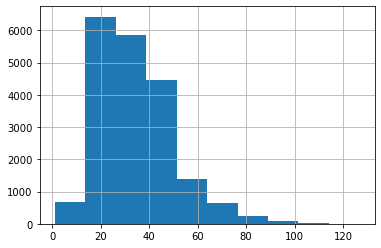

In [538]:
col_info(df.livingArea)

Видим большое количество пропусков. Заменим пропуски на средний процент от общей площади.

In [539]:
meanLivAreaRatio = df[df.livingArea.isna()==False].livingArea.mean() / df[df.livingArea.isna()==False].totalArea.mean()
df.livingArea = df.livingArea.fillna(df.totalArea * meanLivAreaRatio)

## kitchenArea
Площадь кухни

Количество пропусков: 14754,
count    19486.000000
mean        11.397686
std          5.927762
min          1.000000
25%          7.600000
50%         10.000000
75%         13.800000
max         70.900000
Name: kitchenArea, dtype: float64,
Распределение:
10.0    1878
6.0     1529
9.0     1386
8.0     1177
12.0    1148
        ... 
33.5       1
55.8       1
25.4       1
39.0       1
41.3       1
Name: kitchenArea, Length: 360, dtype: int64,


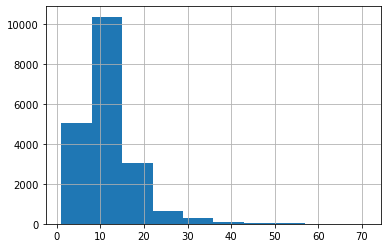

In [540]:
col_info(df.kitchenArea)

Ананлогично жилой площади, заменим пропуски на средную площадь в зависимости от раздела общей площади

In [541]:
meanKitchenAreaRatio = df[df.kitchenArea.isna()==False].kitchenArea.mean() / df[df.kitchenArea.isna()==False].totalArea.mean()
df.kitchenArea = df.kitchenArea.fillna(df.totalArea * meanKitchenAreaRatio)

## roomsCount
Количество комнат

Количество пропусков: 2657,
count    31583.000000
mean         2.036222
std          0.866100
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: roomsCount, dtype: float64,
Распределение:
2.0    12041
1.0     9845
3.0     8541
4.0     1041
5.0       94
6.0       21
Name: roomsCount, dtype: int64,


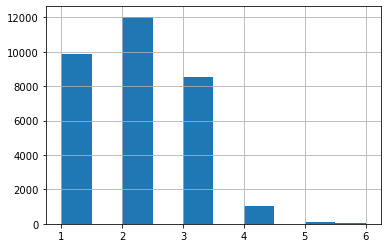

In [542]:
col_info(df.roomsCount)

In [543]:
meanRoomsCountRatio = df[df.roomsCount.isna()==False].roomsCount.mean() / df[df.roomsCount.isna()==False].totalArea.mean()
df.roomsCount = df.roomsCount.fillna(round(df.totalArea * meanRoomsCountRatio))

Количество пропусков: 0,
count    34240.000000
mean         1.977599
std          0.875760
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: roomsCount, dtype: float64,
Распределение:
2.0    12393
1.0    11931
3.0     8680
4.0     1090
5.0       94
0.0       31
6.0       21
Name: roomsCount, dtype: int64,


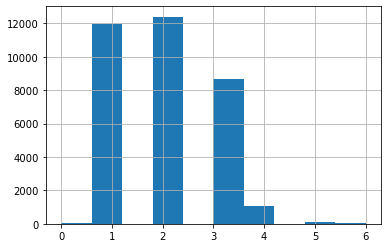

In [544]:
col_info(df.roomsCount)

Заменим количество комнат в квартирах с 0 комнатами на 1

In [545]:
dic_roomsCount = {
    0: 1,
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 6,
}
df['roomsCount'] = df['roomsCount'].map(dic_roomsCount)

Количество пропусков: 0,
count    34240.000000
mean         1.978505
std          0.874231
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: roomsCount, dtype: float64,
Распределение:
2    12393
1    11962
3     8680
4     1090
5       94
6       21
Name: roomsCount, dtype: int64,


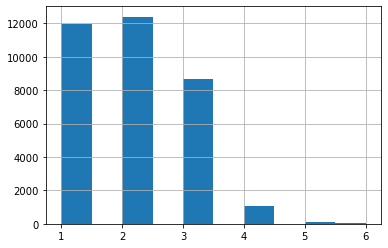

In [546]:
col_info(df.roomsCount)

## price
Стоимость квартиры, целевая переменная

Количество пропусков: 0,
count    3.424000e+04
mean     6.759372e+06
std      2.614814e+07
min      5.300000e+05
25%      3.550000e+06
50%      4.950000e+06
75%      7.200000e+06
max      3.850000e+09
Name: price, dtype: float64,
Распределение:
4500000     639
3500000     589
5500000     544
3600000     538
6500000     535
           ... 
4053000       1
5160960       1
3840000       1
17892000      1
4841500       1
Name: price, Length: 4950, dtype: int64,


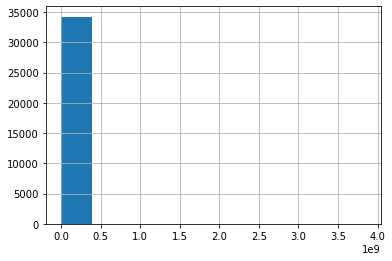

In [547]:
col_info(df.price)

Избавимся от выбросов

In [548]:
#Закомментируем для скорости работы ноутбука
#totalArea_outliners_free = outliers_iqr(df.price)

Медиана: 4950000.0, 25-й перцентиль: 3550000.0, 75-й перцентиль: 7200000.0, IQR: 3650000.0,  Границы выбросов: [-1925000.0, 12675000.0].

In [549]:
df = df[df['price'] <= 12675000]

## mortgageAllowed
Возможность взять в ипотеку

In [550]:
print('Количество пропусков: {},'.format(df.mortgageAllowed.isnull().sum()))
print('{},'.format(df.mortgageAllowed.describe()))
print('Распределение:\n{},'.format(df.mortgageAllowed.value_counts()))

Количество пропусков: 9984,
count     21325
unique        2
top        True
freq      16865
Name: mortgageAllowed, dtype: object,
Распределение:
True     16865
False     4460
Name: mortgageAllowed, dtype: int64,


Много пропусков и не понятно что с ними делать. Удалим признак

In [551]:
df = df.drop(['mortgageAllowed'], axis=1)

## region
Регион

Количество пропусков: 0,
count             31309
unique                3
top       Краснодарский
freq              16409
Name: region, dtype: object,
Распределение:
Краснодарский    16409
Крым             10893
Севастополь       4007
Name: region, dtype: int64,


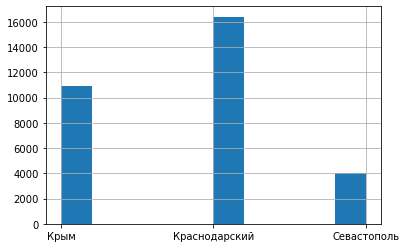

In [552]:
col_info(df.region)

Пропусков нет. Заменим значения на английские названия

In [553]:
dic_region = {
    'Крым': 'crimea',
    'Краснодарский': 'krasnodar',
    'Севастополь': 'sevastopol'
}
df['region'] = df['region'].map(dic_region)

## city
Город

Количество пропусков: 0,
count            31309
unique              24
top       Новороссийск
freq              4503
Name: city, dtype: object,
Распределение:
Новороссийск                4503
Анапа                       4465
Сочи                        4148
Симферополь                 3557
Геленджик                   2745
Ялта                        2732
Гагаринский                 2043
Ленинский                   1032
Евпатория                    987
Феодосия                     915
Алушта                       828
Керчь                        763
Нахимовский                  656
Симферопольский              407
Туапсе                       367
Саки                         318
Балаклавский                 302
Сакский                      189
Туапсинский                  179
Судак                        154
Кировский                      9
Бахчисарайский                 7
Крымский                       2
Севастопольская зона ЮБК       1
Name: city, dtype: int64,


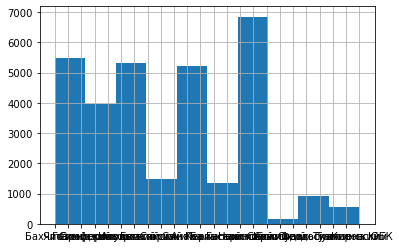

In [554]:
col_info(df.city)

Пропусков нет. Заменим значения на английские названия, отбросим города с количеством квартир < 150

In [555]:
dic_city = {
    'Новороссийск': 'novorossiysk',
    'Анапа': 'anapa',
    'Сочи': 'sochi',
    'Симферополь': 'simferopol',
    'Геленджик': 'gelendzhik',
    'Ялта': 'yalta',
    'Гагаринский': 'gagarinskiy',
    'Ленинский': 'leninskiy',
    'Евпатория': 'evpatoriya',
    'Феодосия': 'feodosiya',
    'Алушта': 'alushta',
    'Керчь': 'kerch',
    'Нахимовский': 'nakhimovskiy',
    'Симферопольский': 'simferopolskiy',
    'Туапсе': 'tuapse',
    'Саки': 'saki',
    'Балаклавский': 'balaklavskiy',
    'Сакский': 'sakskiy',
    'Туапсинский': 'tuapsinskiy',
    'Судак': 'sudak',
}
df['city'] = df['city'].map(dic_city)

In [556]:
df = df[df['city'].isna() == False]

Количество пропусков: 0,
count            31290
unique              20
top       novorossiysk
freq              4503
Name: city, dtype: object,
Распределение:
novorossiysk      4503
anapa             4465
sochi             4148
simferopol        3557
gelendzhik        2745
yalta             2732
gagarinskiy       2043
leninskiy         1032
evpatoriya         987
feodosiya          915
alushta            828
kerch              763
nakhimovskiy       656
simferopolskiy     407
tuapse             367
saki               318
balaklavskiy       302
sakskiy            189
tuapsinskiy        179
sudak              154
Name: city, dtype: int64,


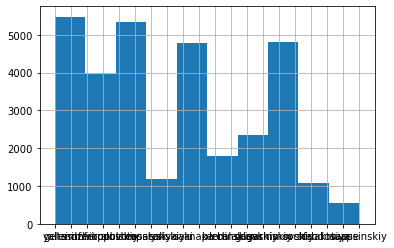

In [557]:
col_info(df.city)

## buildYear
Год постройки

Количество пропусков: 16406,
count    14884.000000
mean      1995.145660
std         24.725197
min       1869.000000
25%       1978.000000
50%       2006.000000
75%       2016.000000
max       2021.000000
Name: buildYear, dtype: float64,
Распределение:
2020.0    988
2019.0    956
2018.0    827
2015.0    685
2017.0    612
         ... 
1904.0      1
1869.0      1
1887.0      1
1928.0      1
1911.0      1
Name: buildYear, Length: 122, dtype: int64,


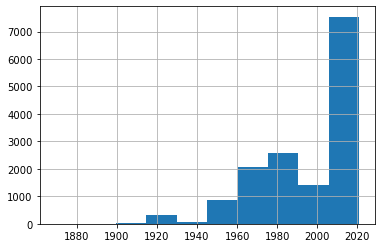

In [558]:
col_info(df.buildYear)

Больше половины пропусков. Удалим признак.

In [559]:
df = df.drop(['buildYear'], axis=1)

## isComplete
Статус завершения строительства

In [560]:
print('Количество пропусков: {},'.format(df.isComplete.isnull().sum()))
print('{},'.format(df.isComplete.describe()))
print('Распределение:\n{},'.format(df.isComplete.value_counts()))

Количество пропусков: 1537,
count     29753
unique        2
top        True
freq      28521
Name: isComplete, dtype: object,
Распределение:
True     28521
False     1232
Name: isComplete, dtype: int64,


Скорее всего пропуски означают, что дом уже построен. Заменим пустые значения на true.

In [561]:
df.isComplete = df.isComplete.fillna(True)

In [562]:
dic_isComplete = {
    True: 1,
    False: 0,
}
df['isComplete'] = df['isComplete'].map(dic_isComplete)

## passengerLiftsCount
Количество пассажирских лифтов

Количество пропусков: 13464,
count    17826.000000
mean         0.798272
std          0.623189
min         -1.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: passengerLiftsCount, dtype: float64,
Распределение:
 1.0    11244
 0.0     5234
 2.0     1136
 3.0      124
 4.0       86
-1.0        2
Name: passengerLiftsCount, dtype: int64,


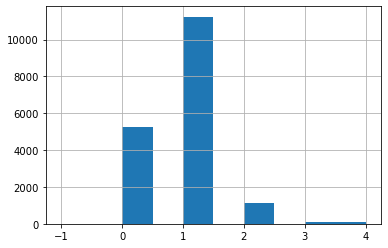

In [563]:
col_info(df.passengerLiftsCount)

Заменим значение -1 на 1

In [564]:
df.loc[df.passengerLiftsCount==-1, 'passengerLiftsCount'] = 1

Обработаем пропуски. Посмотрим на количество этажей в домах с пропусками.

In [565]:
df[df.passengerLiftsCount.isna() == True].floorsCount.value_counts()

5     5002
3     1428
4     1413
2     1086
9      958
6      633
10     595
1      425
7      417
8      322
16     212
12     188
11     154
20      96
13      90
14      87
17      85
18      70
15      64
19      38
21      30
25      25
23      18
24      13
22       9
26       4
27       1
30       1
Name: floorsCount, dtype: int64

В домах с количеством этажей < 6 чаще всего нет лифтов

In [566]:
df[df['floorsCount'] <= 5].passengerLiftsCount.value_counts()

0.0    3469
1.0     526
2.0      18
4.0       3
3.0       2
Name: passengerLiftsCount, dtype: int64

В домах с количеством этажей > 5 чаще всего 1 пассажирский лифт

In [567]:
df[df['floorsCount'] > 5].passengerLiftsCount.value_counts()

1.0    10720
0.0     1765
2.0     1118
3.0      122
4.0       83
Name: passengerLiftsCount, dtype: int64

Заменим пропуски

In [568]:
df.loc[df.passengerLiftsCount==-1, 'passengerLiftsCount'] = 1

In [569]:
df.loc[df['floorsCount'] <= 5, 'passengerLiftsCount'] = df[df['floorsCount'] <= 5].passengerLiftsCount.fillna(0)
df.loc[df['floorsCount'] > 5, 'passengerLiftsCount'] = df[df['floorsCount'] > 5].passengerLiftsCount.fillna(1)

Количество пропусков: 0,
count    31290.000000
mean         0.586258
std          0.609870
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: passengerLiftsCount, dtype: float64,
Распределение:
1.0    15356
0.0    14588
2.0     1136
3.0      124
4.0       86
Name: passengerLiftsCount, dtype: int64,


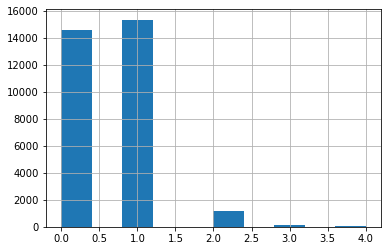

In [570]:
col_info(df.passengerLiftsCount)

## cargoLiftsCount
Количество грузовых лифтов

Количество пропусков: 19254,
count    12036.000000
mean         0.424144
std          0.549029
min         -2.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: cargoLiftsCount, dtype: float64,
Распределение:
 0.0    7208
 1.0    4592
 2.0     206
 4.0      16
 3.0      13
-2.0       1
Name: cargoLiftsCount, dtype: int64,


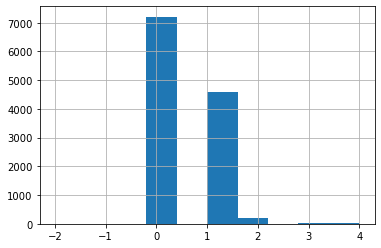

In [571]:
col_info(df.cargoLiftsCount)

Заменим значение -2 на 2, а пропуски на 0

In [572]:
df.loc[df.cargoLiftsCount==-2, 'cargoLiftsCount'] = 2
df.cargoLiftsCount = df.cargoLiftsCount.fillna(0)

## materialType
Материал дома

Количество пропусков: 10007,
count        21283
unique          12
top       monolith
freq          9765
Name: materialType, dtype: object,
Распределение:
monolith             9765
block                4358
panel                3345
brick                2564
monolithBrick        1065
stalin                102
old                    44
wood                   24
aerocreteBlock          7
foamConcreteBlock       5
wireframe               3
gasSilicateBlock        1
Name: materialType, dtype: int64,


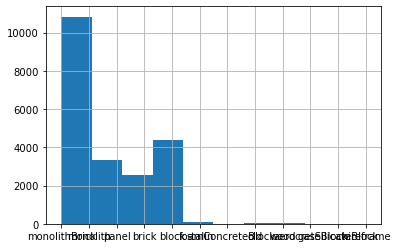

In [573]:
col_info(df.materialType)

Заменим пропуски на значение unknown

In [574]:
df.materialType = df.materialType.fillna('unknown')

## Итоги первичного осмотра данных

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31290 entries, 1 to 36508
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   balconiesCount       31290 non-null  float64
 1   newBuilding          31290 non-null  int64  
 2   flatType             31290 non-null  object 
 3   floorNumber          31290 non-null  float64
 4   fromDeveloper        31290 non-null  int64  
 5   isApartments         31290 non-null  int64  
 6   isAuction            31290 non-null  int64  
 7   kitchenArea          31290 non-null  float64
 8   livingArea           31290 non-null  float64
 9   loggiasCount         31290 non-null  float64
 10  roomsCount           31290 non-null  int64  
 11  totalArea            31290 non-null  float64
 12  price                31290 non-null  int64  
 13  region               31290 non-null  object 
 14  city                 31290 non-null  object 
 15  floorsCount          31290 non-null 

В результате данного шага мы оставили 20 признаков и избавились от пропусков.

# Генерация признаков

## balOrLogCount
сгенерируем новый признак, значения которогу будут равняться сумме количества лоджий и балконов т.к. для жильцов большой разницы нет (как мне кажется).

In [576]:
df['balOrLogCount'] = df.loggiasCount + df.balconiesCount

## isBasement
Находится ли квартира в подвале

In [577]:
df['isBasement'] = df['floorNumber'].apply(lambda x: 1 if x < 0 else 0)

In [578]:
df.isBasement.value_counts()

0    31252
1       38
Name: isBasement, dtype: int64

## isFirstFloor
Находится ли квартира на первом этаже

In [579]:
df['isFirstFloor'] = df['floorNumber'].apply(lambda x: 1 if x == 1 else 0)

In [580]:
df.isFirstFloor.value_counts()

0    25600
1     5690
Name: isFirstFloor, dtype: int64

## backwardFloorNumber
Номер этажа, если считать с крыши

In [581]:
# Создадим для начала вспомогательный признак - номер этажа, если считать сверху вниз.
df['backwardFloorNumber']=df['floorsCount']-df['floorNumber']
# Не будем удалять этот признак т.к. возможно есть корреляция с целевой переменной

## isLastFloor
Находится ли квартира на последнем этаже

In [582]:
df['isLastFloor'] = df['backwardFloorNumber'].apply(lambda x: 1 if x == 0 else 0)

In [583]:
df.isLastFloor.value_counts()

0    24915
1     6375
Name: isLastFloor, dtype: int64

## liftsCount
Суммарное количество лифтов

In [584]:
df['liftsCount'] = df['passengerLiftsCount'] + df['cargoLiftsCount']

## cityPopulation
Население города

Добавим данные о населении города, взяв информацию из Википедии.

In [585]:
dic_cityPopulation = {
    'novorossiysk': 274956,
    'anapa': 88879,
    'sochi': 443562,
    'simferopol': 342054,
    'gelendzhik': 76783,
    'yalta': 79056,
    'gagarinskiy': 159017,
    'leninskiy': 58441,
    'evpatoriya': 108248,
    'feodosiya': 68001,
    'alushta': 30088,
    'kerch': 151548,
    'nakhimovskiy': 119507,
    'simferopolskiy': 161997,
    'tuapse': 61180,
    'saki': 24654,
    'balaklavskiy': 51092,
    'sakskiy': 76426,
    'tuapsinskiy': 127717,
    'sudak': 16489,
}
df['cityPopulation'] = df['city'].map(dic_cityPopulation)

## cityArea
Площадь города

Добавим данные о площади города, взяв информацию из Википедии.

In [586]:
dic_cityArea = {
    'novorossiysk': 83.5,
    'anapa': 59,
    'sochi': 176.8,
    'simferopol': 107.4,
    'gelendzhik': 19.25,
    'yalta': 18.2,
    'gagarinskiy': 61.1,
    'leninskiy': 2918.6,
    'evpatoriya': 65,
    'feodosiya': 40,
    'alushta': 7,
    'kerch': 108,
    'nakhimovskiy': 267.7,
    'simferopolskiy': 1752.5,
    'tuapse': 33.4,
    'saki': 28.7,
    'balaklavskiy': 530.3,
    'sakskiy': 2257.5,
    'tuapsinskiy': 2399.2,
    'sudak': 23.5,
}
df['cityArea'] = df['city'].map(dic_cityArea)

## populationDensity
Плотность населения

In [591]:
df['populationDensity'] = df.cityPopulation / df.cityArea

## areaPerRoom
Отношение общей площади к количеству комнат

In [592]:
df['areaPerRoom'] = df.totalArea / df.roomsCount

# Промежуточные итоги

In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31290 entries, 1 to 36508
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   balconiesCount       31290 non-null  float64
 1   newBuilding          31290 non-null  int64  
 2   flatType             31290 non-null  object 
 3   floorNumber          31290 non-null  float64
 4   fromDeveloper        31290 non-null  int64  
 5   isApartments         31290 non-null  int64  
 6   isAuction            31290 non-null  int64  
 7   kitchenArea          31290 non-null  float64
 8   livingArea           31290 non-null  float64
 9   loggiasCount         31290 non-null  float64
 10  roomsCount           31290 non-null  int64  
 11  totalArea            31290 non-null  float64
 12  price                31290 non-null  int64  
 13  region               31290 non-null  object 
 14  city                 31290 non-null  object 
 15  floorsCount          31290 non-null 

Мы сгенерировали 10 новых признаков и теперь их общее количество - 30.

   * Числовые - 18: balconiesCount, floorNumber, kitchenArea, livingArea, loggiasCount, roomsCount, totalArea, floorsCount, passengerLiftsCount, cargoLiftsCount, balOrLogCount, backwardFloorNumber, liftsCount, cityPopulation, cityArea, populationDensity, areaPerRoom и целевая переменная price
   * Категориальные оценочные - 4 шт.: flatType, region, city, materialType
   * Категориальные бинарные - 8 шт.: newBuilding, fromDeveloper, isApartments, isAuction, isComplete, isBasement, isFirstFloor, isLastFloor

# Корреляционный анализ
Выясним, какие столбцы коррелируют со стоймостью квартиры. Это поможет понять, какие параметры стоит оставить для модели, а какие - исключить.
Корреляцию рассмотрим только для числовых столбцов.

In [601]:
corr = df[[
    'balconiesCount',
    'floorNumber',
    'kitchenArea',
    'livingArea',
    'loggiasCount',
    'roomsCount',
    'totalArea',
    'floorsCount',
    'passengerLiftsCount',
    'cargoLiftsCount',
    'balOrLogCount',
    'backwardFloorNumber',
    'liftsCount',
    'cityPopulation',
    'cityArea',
    'populationDensity',
    'areaPerRoom',
    'price'
]].corr()

In [602]:
corr

,balconiesCount,floorNumber,kitchenArea,livingArea,loggiasCount,roomsCount,totalArea,floorsCount,passengerLiftsCount,cargoLiftsCount,balOrLogCount,backwardFloorNumber,liftsCount,cityPopulation,cityArea,populationDensity,areaPerRoom,price
balconiesCount,1.000000,0.035642,0.033133,0.099867,-0.182838,0.093021,0.102103,-0.026097,-0.025973,0.020519,0.664307,-0.067194,-0.008991,-0.024105,0.034302,-0.027951,-0.015056,0.064703
floorNumber,0.035642,1.000000,0.114936,-0.010326,0.119121,-0.082396,0.041011,0.641852,0.441170,0.323263,0.119197,-0.102890,0.466150,0.107905,-0.084243,0.068901,0.170667,0.091323
kitchenArea,0.033133,0.114936,1.000000,0.458541,0.116203,0.322917,0.666908,0.164269,0.185050,0.085088,0.114963,0.105563,0.171964,-0.126983,-0.081315,0.121319,0.336728,0.436231
livingArea,0.099867,-0.010326,0.458541,1.000000,0.158473,0.787234,0.908137,-0.036936,0.018628,-0.053980,0.200708,-0.038251,-0.011871,-0.118199,0.011422,0.040034,-0.068046,0.528743
loggiasCount,-0.182838,0.119121,0.116203,0.158473,1.000000,0.152761,0.203836,0.156701,0.150410,0.077820,0.613400,0.091830,0.143814,-0.057172,0.026070,-0.019977,0.027996,0.059670
roomsCount,0.093021,-0.082396,0.322917,0.787234,0.152761,1.000000,0.757450,-0.142426,-0.092522,-0.117445,0.190866,-0.107669,-0.120925,-0.080591,0.050400,-0.040771,-0.519373,0.351572
totalArea,0.102103,0.041011,0.666908,0.908137,0.203836,0.757450,1.000000,0.043164,0.092934,-0.012903,0.236993,0.017626,0.060405,-0.158780,-0.012866,0.067408,0.091454,0.586556
floorsCount,-0.026097,0.641852,0.164269,-0.036936,0.156701,-0.142426,0.043164,1.000000,0.664737,0.456754,0.098172,0.696718,0.688226,0.170282,-0.130995,0.101867,0.255339,0.132872
passengerLiftsCount,-0.025973,0.441170,0.185050,0.018628,0.150410,-0.092522,0.092934,0.664737,1.000000,0.406997,0.093489,0.449563,0.904642,0.133287,-0.126677,0.167142,0.250599,0.229907
cargoLiftsCount,0.020519,0.323263,0.085088,-0.053980,0.077820,-0.117445,-0.012903,0.456754,0.406997,1.000000,0.075648,0.290076,0.757465,0.132905,-0.080142,0.094193,0.144055,0.074435


Воспользуемся тепловой картой.

<AxesSubplot:>

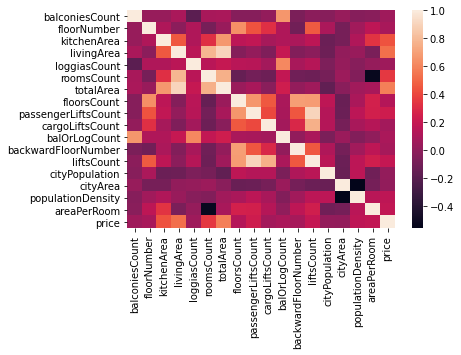

In [604]:
sns.heatmap(corr)

Корреляционный анализ показывает, что на целевую переменную больше всего влияет площадь (общая, кухни, жилая) и количество комнат.

Сильно скоррелированы между собой признаки totalArea и livingArea, а также liftsCount и passengerLiftsCount. На этапе тестирования модели стоит попробовать оставить только totalArea и passengerLiftsCount т.к. они сильнее скоррелированы с целевой переменной.

Посмотрим, как выглядят распределения числовых признаков

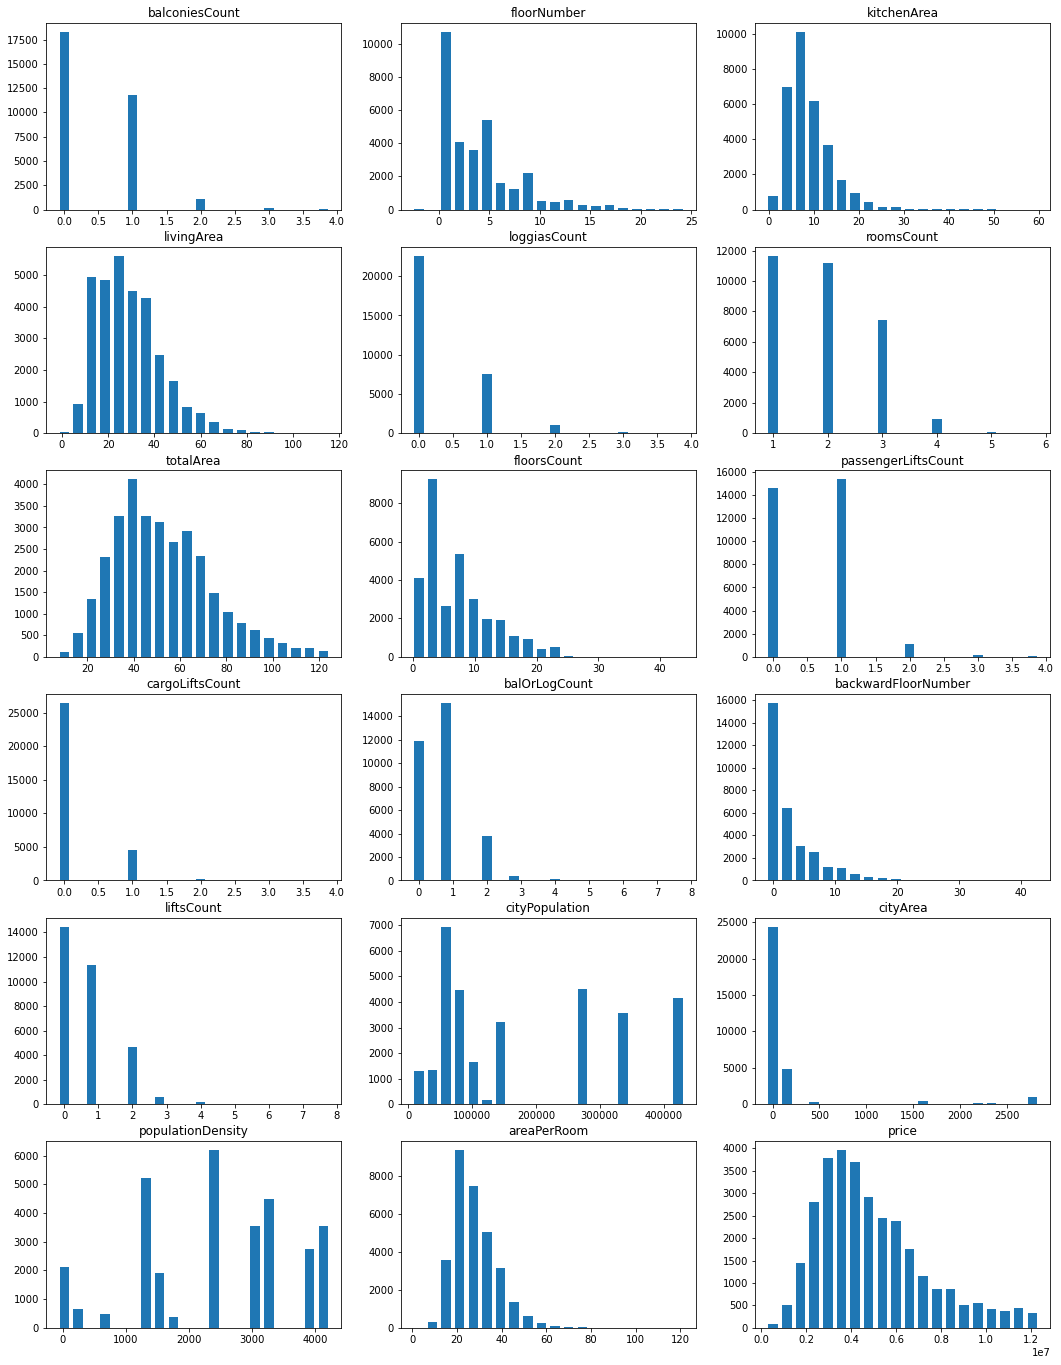

In [609]:
def visualize_distributions(titles_values_dict):
  columns = min(3, len(titles_values_dict))
  rows = (len(titles_values_dict) - 1) // columns + 1
  fig = plt.figure(figsize = (columns * 6, rows * 4))
  for i, (title, values) in enumerate(titles_values_dict.items()):
    hist, bins = np.histogram(values, bins = 20)
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.bar(bins[:-1], hist, width = (bins[1] - bins[0]) * 0.7)
    ax.set_title(title)
  plt.show()

visualize_distributions({
    'balconiesCount': df.balconiesCount,
    'floorNumber': df.floorNumber,
    'kitchenArea': df.kitchenArea,
    'livingArea': df.livingArea,
    'loggiasCount': df.loggiasCount,
    'roomsCount': df.roomsCount,
    'totalArea': df.totalArea,
    'floorsCount': df.floorsCount,
    'passengerLiftsCount': df.passengerLiftsCount,
    'cargoLiftsCount': df.cargoLiftsCount,
    'balOrLogCount': df.balOrLogCount,
    'backwardFloorNumber': df.backwardFloorNumber,
    'liftsCount': df.liftsCount,
    'cityPopulation': df.cityPopulation,
    'cityArea': df.cityArea,
    'populationDensity': df.populationDensity,
    'areaPerRoom': df.areaPerRoom,
    'price': df.price,
})

Видим, что числовые признаки необходимо будет нормализовть и логорифмировать для получения нормального распределения.

# Анализ номинативных переменных
Посмотрим на распределение стоймости квартир в зависимости от значения номинативных переменных.

In [605]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 6))
    sns.boxplot(x=column, y='price', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

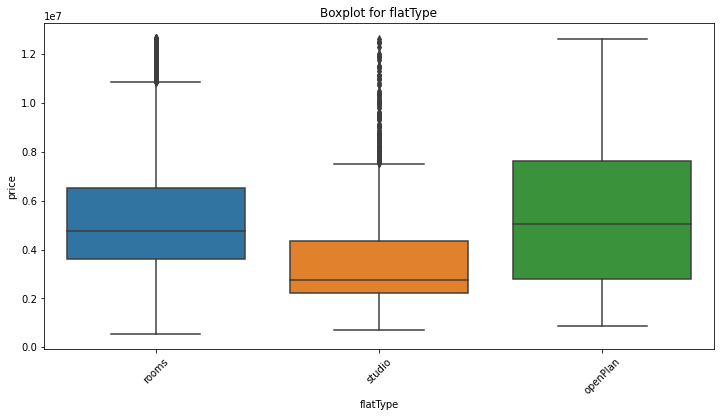

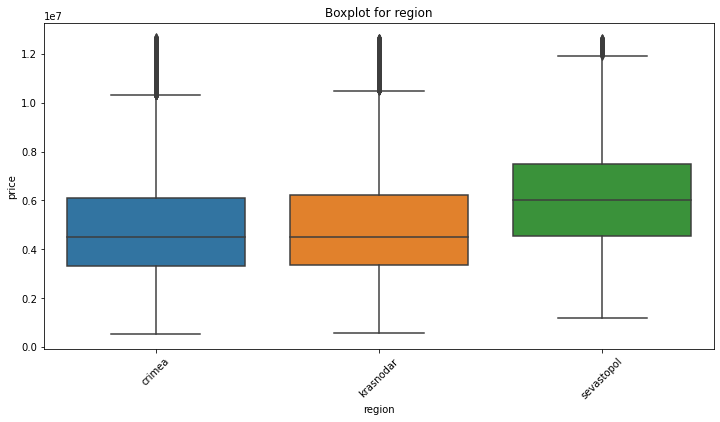

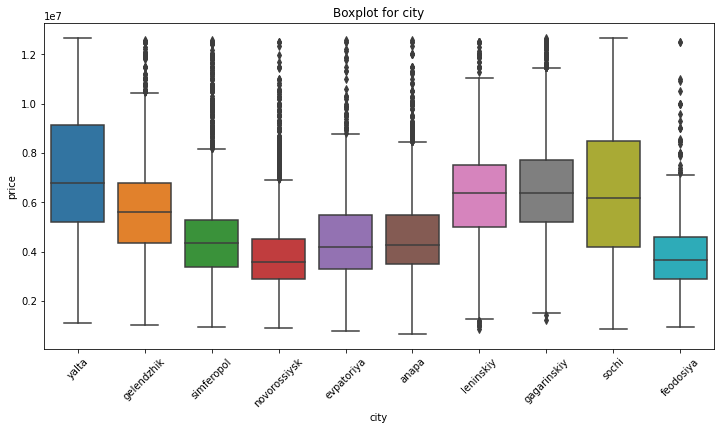

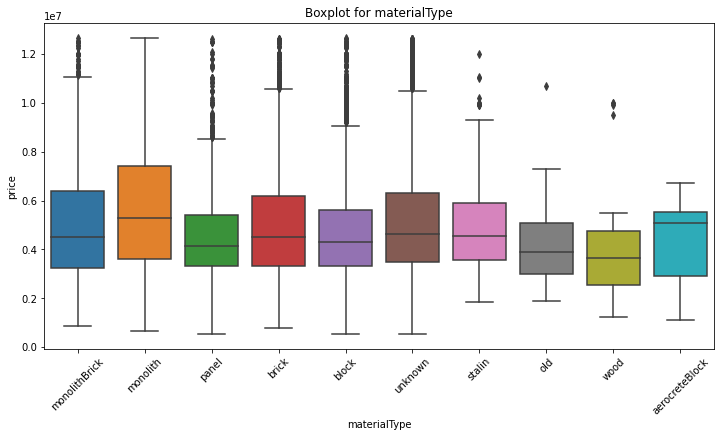

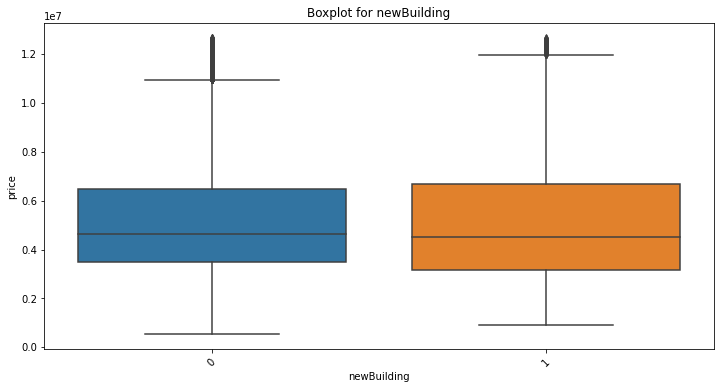

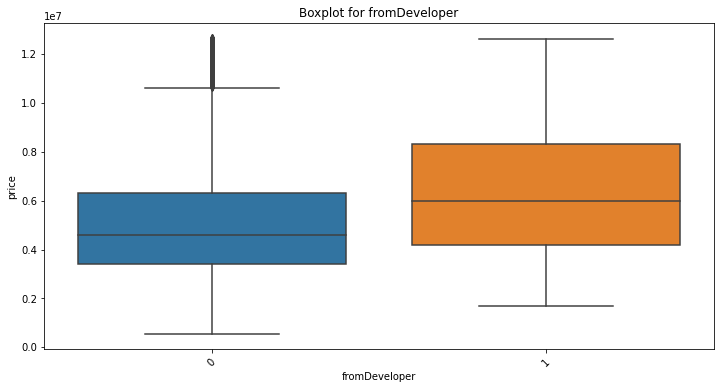

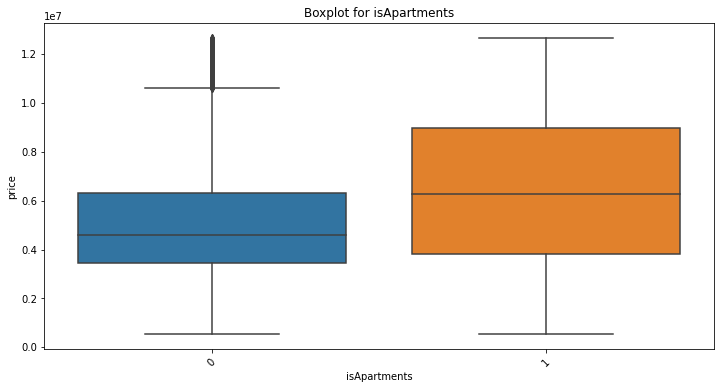

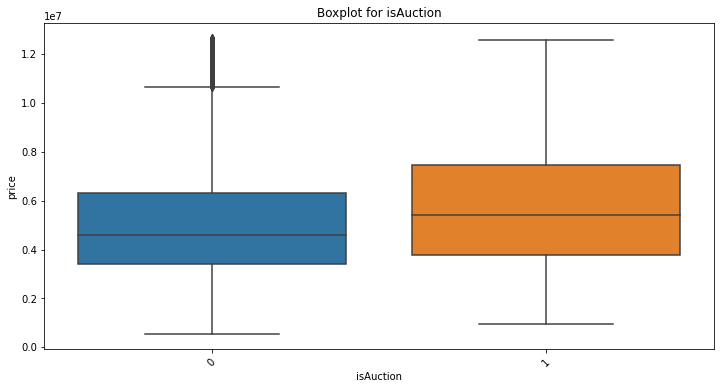

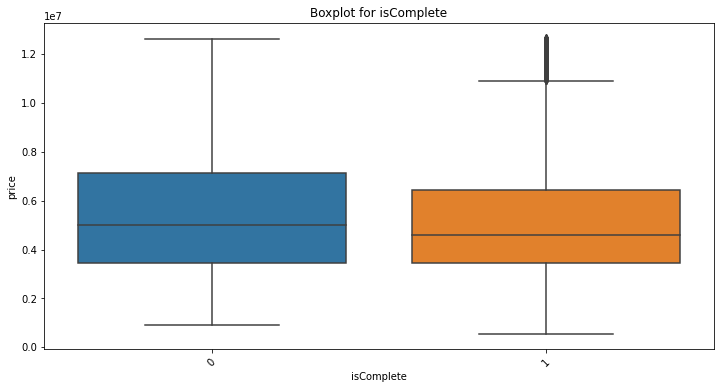

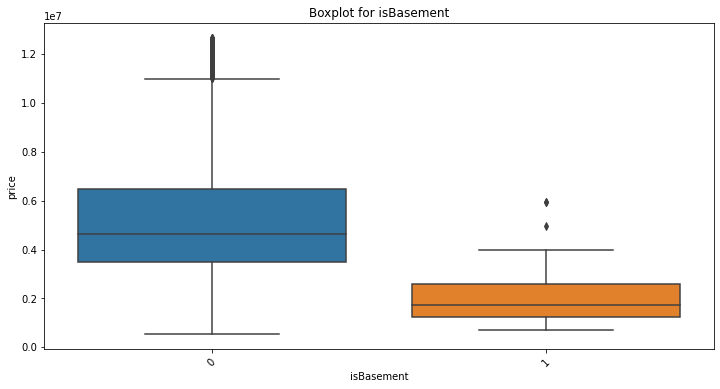

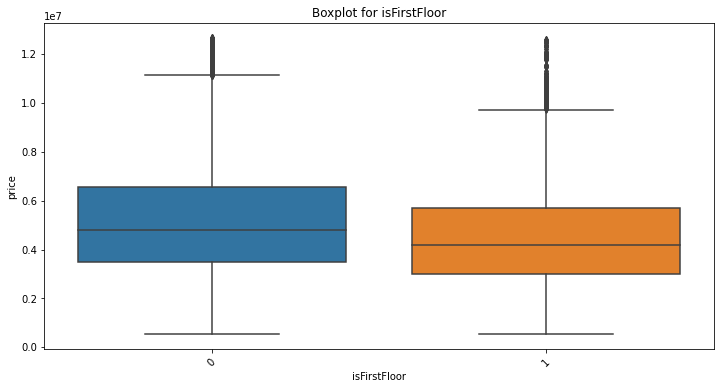

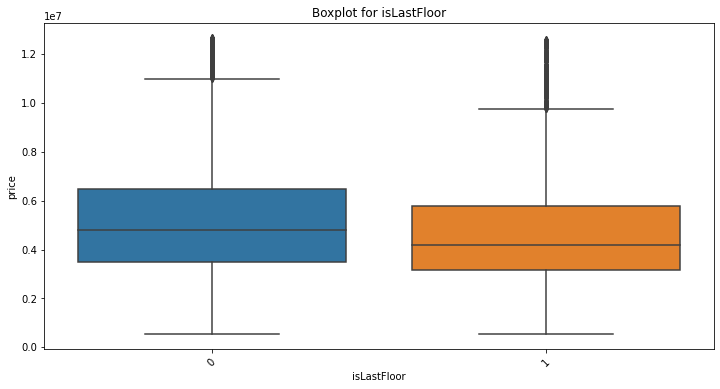

In [606]:
for col in ['flatType',
            'region',
            'city',
            'materialType',
            'newBuilding',
            'fromDeveloper',
            'isApartments',
            'isAuction',
            'isComplete',
            'isBasement',
            'isFirstFloor',
            'isLastFloor',
            ]:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме newBuilding и isLastFloor могут влиять на стоимость квартиры.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения стоимости квартир по различным параметрам неразличимы:

In [607]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'price'], 
                        df.loc[df.loc[:, column] == comb[1], 'price']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [608]:
for col in ['flatType',
            'region',
            'city',
            'materialType',
            'newBuilding',
            'fromDeveloper',
            'isApartments',
            'isAuction',
            'isComplete',
            'isBasement',
            'isFirstFloor',
            'isLastFloor',
            ]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки flatType
Найдены статистически значимые различия для колонки region
Найдены статистически значимые различия для колонки city
Найдены статистически значимые различия для колонки materialType
Найдены статистически значимые различия для колонки fromDeveloper
Найдены статистически значимые различия для колонки isApartments
Найдены статистически значимые различия для колонки isAuction
Найдены статистически значимые различия для колонки isComplete
Найдены статистически значимые различия для колонки isBasement
Найдены статистически значимые различия для колонки isFirstFloor
Найдены статистически значимые различия для колонки isLastFloor


Как мы видим, можно выделить 11 параметров. На целевую переменную слабо влияет только newBuilding.
Попробуем откинуть данный параметр на этапе тестирования модели.

# Результаты EDA

В результате EDA мы проделали следующую работу:
* 1. Ознакомились с данными.
* 2. Избавились от пропусков.
* 3. Избавились от выбросов в переменных price и totalArea.
* 4. Сгенерировали новые признаки.
* 5. Провели корреляционный анализ, в результате которого решили в дальнейшем удалить признаки livingArea и liftsCount.
* 6. Посмотрели на распределение числовых признаков, в результате решили в дальнейшем нормализовать и логорифмировать числовые признаки.
* 8. Провели анализ номинативных переменных, в результате увидили слаболе влияние параметра newBuilding на целевую переменную.